## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [2]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image

from skimage.color import rgb2gray


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

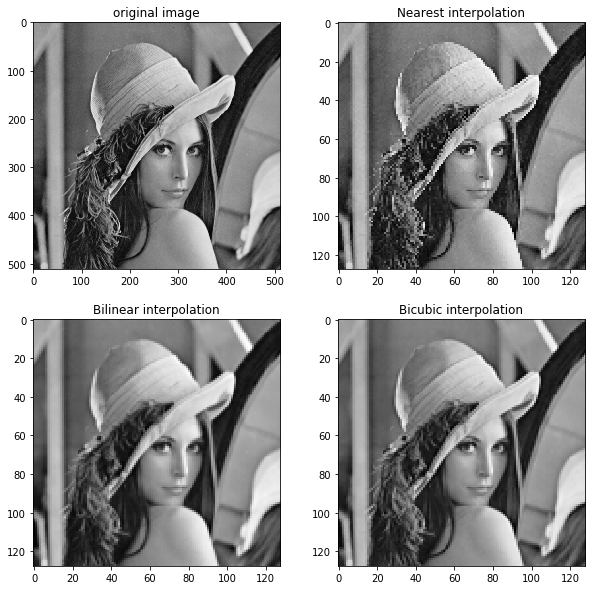

In [3]:
filename = './images/lena-grey.bmp'
lena_im = io.imread(filename)
lena_im_float = img_as_float(lena_im)


LenaNearest=misc.imresize(lena_im_float, 25, interp='nearest')
LenaBilinear=misc.imresize(lena_im_float, 25, interp='bilinear')
LenaBicubic=misc.imresize(lena_im_float, 25, interp='bicubic')

fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(lena_im_float, cmap=cm.gray)
ax0.set_title('original image')

ax1.imshow(LenaNearest, cmap=cm.gray)
ax1.set_title('Nearest interpolation')


ax2.imshow(LenaBilinear, cmap=cm.gray)
ax2.set_title('Bilinear interpolation')


ax3.imshow(LenaBicubic, cmap=cm.gray)
ax3.set_title('Bicubic interpolation')

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


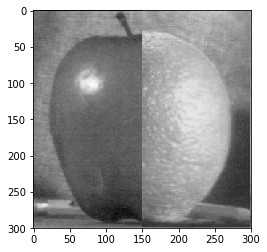

In [5]:
def simple_blend (img1, img2, t): #i suppose that these 2 images are of the same size (i can resize later)
    img_bl = img1
    for i in range(0,img1.shape[0]-1):
        for j in range(0,img1.shape[1]-1):
            img_bl[i,j]=img1[i,j] if (j < t) else img2[i,j]
    return img_bl

filename = './images/apple.jpeg'
apple = io.imread(filename)
apple = img_as_float(apple)
apple= rgb2gray(apple)

filename = './images/orange.jpeg'
orange = io.imread(filename)
orange = img_as_float(orange)
orange = rgb2gray(orange)

orangeAppleSimple=simple_blend(apple, orange, 150)

plt.imshow(orangeAppleSimple, cmap=cm.gray)

[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164]
[ 0.          0.03333333  0.06666667  0.1         0.13333333  0.16666667
  0.2         0.23333333  0.26666667  0.3         0.33333333  0.36666667
  0.4         0.43333333  0.46666667  0.5         0.53333333  0.56666667
  0.6         0.63333333  0.66666667  0.7         0.73333333  0.76666667
  0.8         0.83333333  0.86666667  0.9         0.93333333  0.96666667]


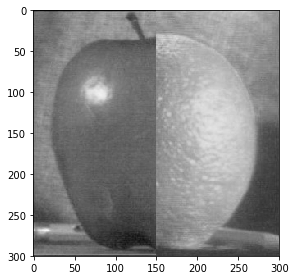

In [12]:
def alpha_blend (img1, img2, window):
    x1 = int(img1.shape[1]/2)-window
    x2 = int(img1.shape[1]/2)+window
    x = np.arange(x1, x2)
    print(x)
    alpha = (x-x1)/(x2 - x1)
    img_bl_alpha = img2
    print(alpha)
    for i in range(0,img1.shape[0]-1): #this amount of 'for' loops is due to desperate desire to make it work decently. Still doesn't work properly 
        for j in range(0, x1):
            img_bl_alpha[i,j] = img1[i,j]
        for j in range(x1, x2):
            img_bl_alpha[i,j] = alpha[j-x1]*img2[i,j] + (1 - alpha[j-x1])*img1[i,j]
        for j in range(x2,img1.shape[1]-1):
            img_bl_alpha[i,j] = img2[i,j]
    return img_bl_alpha



orangeAppleAlpha=alpha_blend(apple, orange, 15)

io.imshow(orangeAppleAlpha)




In [15]:
# generate Gaussian pyramid for apple
from skimage.transform import pyramid_gaussian
pGApple = pyramid_gaussian(apple, downscale = 2)

# generate Gaussian pyramid for orange
pGOrange = pyramid_gaussian(orange, downscale = 2)

# generate Laplacian Pyramid for apple

from skimage.transform import pyramid_laplacian
pLApple = pyramid_laplacian(apple, downscale = 2)

# generate Laplacian Pyramid for orange

pLOrange = pyramid_laplacian(orange, downscale = 2)

print(pLApple)

# # Now add left and right halves of images in each level
# LS = []
# for la,lb in zip(plApple,lpB):
#     rows,cols,dpt = la.shape
#     ls = np.hstack((la[:,0:cols/2], lb[:,cols/2:]))
#     LS.append(ls)
# # now reconstruct
# ls_ = LS[0]
# for i in xrange(1,6):
#     ls_ = cv2.pyrUp(ls_)
#     ls_ = cv2.add(ls_, LS[i])
# # image with direct connecting each half
# real = np.hstack((A[:,:cols/2],B[:,cols/2:]))
# cv2.imwrite('Pyramid_blending2.jpg',ls_)
# cv2.imwrite('Direct_blending.jpg',real)

<generator object pyramid_laplacian at 0x00000244E0DD58E0>
